# NLP Project

## Project Goals
* Webscrape 682 top starred repositories on GitHub and clean the data.
* Explore to find features that indicate a specific programming language.
* Based on the findings predict the main programming language of an out-of-sample repository.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

from importlib import reload

import acquire as a
import prepare as p
import explore as e
import model as m

# Acquire

* Data acquired from GitHub starred repos README files

# Prepare

**Prepare Actions:**
* Determine the top five languages and lump all others as "Other" (NULLs have been kept and listed as "Not Listed")
* README content prep:
    * Normalize language (remove any non-ASCII characters aka. other languages)
    * Remove all punctuation
    * Make all lowercase
    * Determine stopwords by looking words that appear evenly across all languages and remove them
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'language'
* Scaled continuous variable

## Data dictionary
| Feature | Definition | Type |
|:--------|:-----------|:-------
|**repo**| Name of the repository on GitHub| *string*|
|**word_freq**| Number of times a word appears across all README| *float*|
|**lemmatized_len**| Number of characters in| *int*|
|**username**| Username of GitHub user| *string*|
|**Target variable**
|**language**| Primary programming language used in the repository | *string* |


In [2]:
# acquiring data
df = a.acquire_readmes()

# prepping data
df = p.prep_df_for_nlp(df,'readme_contents',extra_words=p.EXTRA_WORDS)

# splitting data into train, validate, and test
train, validate, test = p.split_data(df, 'language')

## A brief look at the data

In [3]:
# show the first 5 rows of the data
train.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
482,awesome-actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532
646,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872
474,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064
545,Best-App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646
539,actix-web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17


# Explore

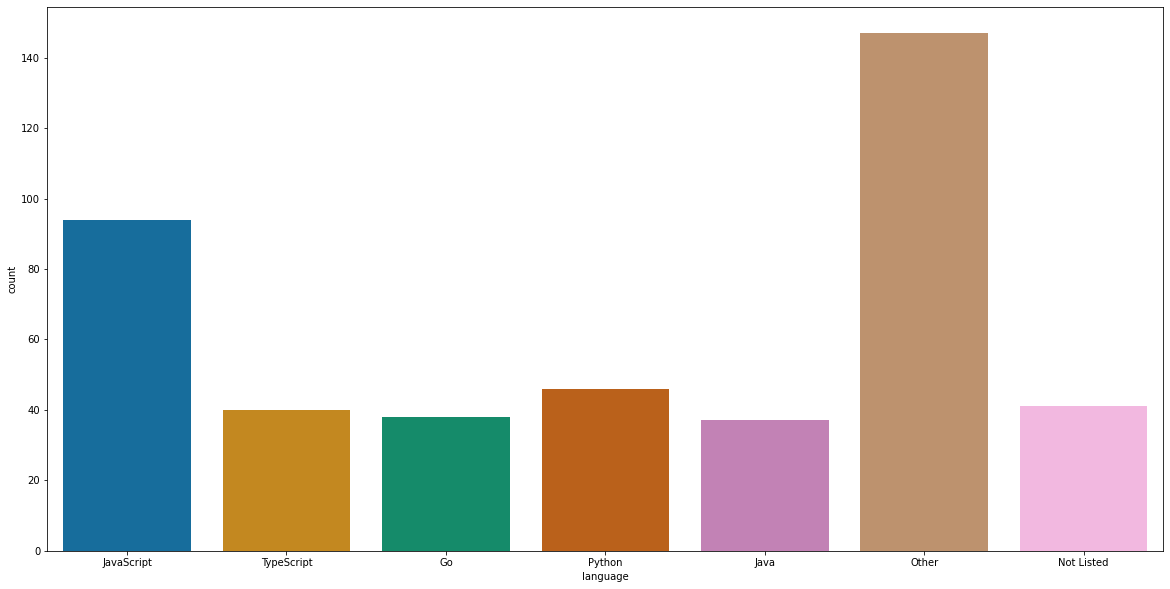

In [4]:
# Distribution of READMEs across languages
e.language_distribution(train)

## Does the name of the programming language appearing in the README indicate the main programming language?

### JavaScript?

In [5]:
# χ^2 test for appearance of word 'javascript' in JavaScript READMEs
e.language_name_chi2(df, 'JavaScript')

## Because $\alpha$ > p,we  reject $H_0$

### TypeScript?

In [6]:
# χ^2 test for appearance of word 'typescript' in TypeScript READMEs
e.language_name_chi2(df, 'TypeScript')

## Because $\alpha$ > p,we  reject $H_0$

### Go?

In [7]:
# χ^2 test for appearance of word 'go' in Go READMEs
e.language_name_chi2(df, 'Go')

## Because $\alpha$ > p,we  reject $H_0$

### Python?

In [8]:
# χ^2 test for appearance of word 'python' in Python READMEs
e.language_name_chi2(df, 'Python')

## Because $\alpha$ > p,we  reject $H_0$

### Java?

In [9]:
# χ^2 test for appearance of word 'java' in Java READMEs
e.language_name_chi2(df, 'Java')

## Because $\alpha$ > p,we  reject $H_0$

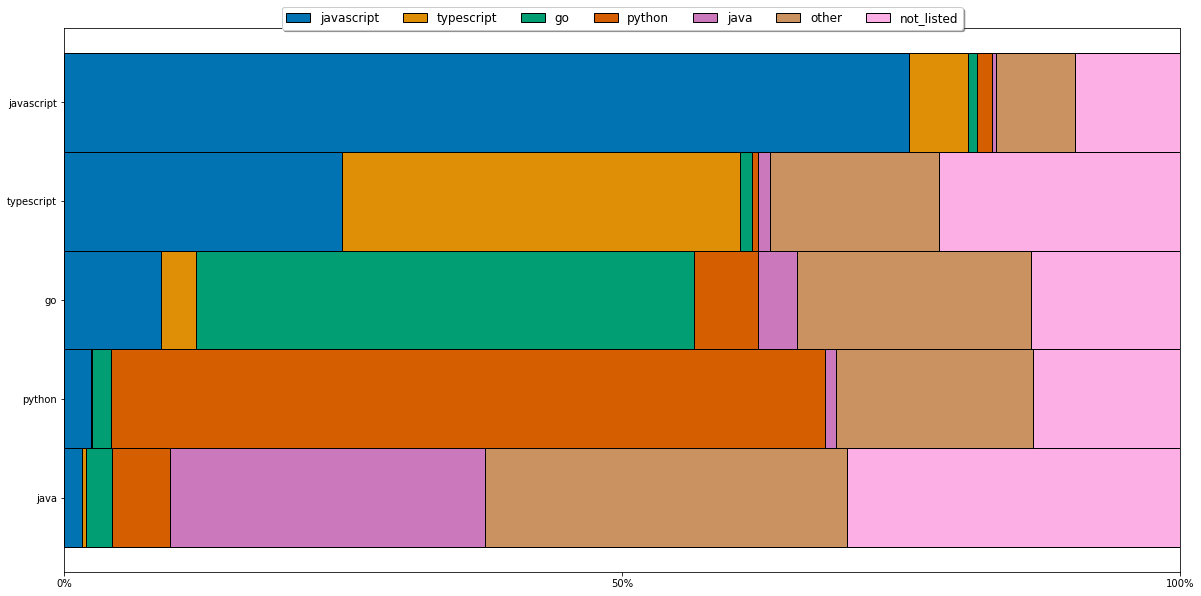

In [10]:
# Show the percentage of each word's appearance in the READMEs
e.language_name_percentage_plot(train)

## Does the frequency of a certain word within a README indicate the main programming language?

In [11]:
# Print the idf_values.describe()
e.get_idf(train)

count    46023.000000
mean         6.140426
std          0.651265
min          1.359252
25%          6.402677
50%          6.402677
75%          6.402677
max          6.402677
dtype: float64

## Does the length of the README indicate the main programming language?

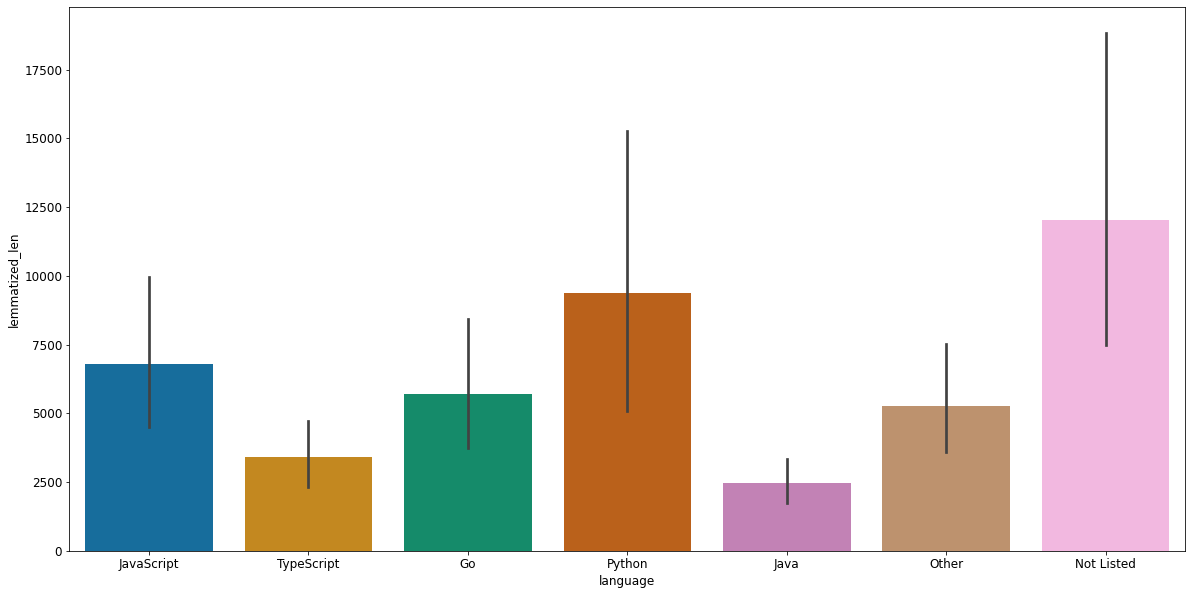

In [12]:
# Show the length of each README by programming language
e.readme_len_plot(train)

In [13]:
# Kruscal test for length of README
e.readme_len_kruskal(train)

## Because $\alpha$ > p,we  reject $H_0$

## Does a certain word appearing in the repo title indicate the main programming language?

In [1]:
# χ^2 test for the word "awesome" and programming language
e.title_chi2(df, 'awesome')

NameError: name 'e' is not defined

In [15]:
# χ^2 test for the word "react" and programming language
e.title_chi2(df, 'react')

## Because $\alpha$ > p,we  reject $H_0$

In [16]:
# χ^2 test for the word "go" and programming language
e.title_chi2(df, 'go')

## Because $\alpha$ > p,we  reject $H_0$

# Exploration Summary

* The name of the language appearing in the README of that languge shows significance.
* The length of the README appears to be an indicator of a README's primary language
* The words 'awesome','react', and 'go' appear to be indicators of a README's primary language

# Features I am moving to modeling With
| Feature | Reason | 
|:--------|:-----------|
|**lemmatized_len**| $t-test$ results|
|**language name in readme**| $chi^2$ test results|
|**repo title words('awesome','react','go')**| $chi^2$ test results|


# Features I'm not moving to modeling with
| Feature | Reason | 
|:--------|:-----------|
|**repo title**| Using appearance of certain words so don't need the full title|
|**username**| Didn't find any significance between username and main programming language|
|**README content**|  Using appearance of certain words so don't need the full content|

# Modeling
* ??????

In [17]:
# prep data for modeling
#train_X, validate_X, test_X, train_y, validate_y, test_y = m.model_prep(train,validate,test)

In [18]:
y_train = train.language

In [19]:
#baseline based on the percentage of the mode
baseline = y_train.value_counts(normalize=True).max()
#print results
print(f'Baseline accuracy: {baseline:.2%}')

Baseline accuracy: 33.18%


## Decision Tree

* Decision Tree accuracy is about equal to the baseline

## Random Forest

* Random Forest accuracy is about equal to the baseline

## Logistic Regression

* Logistic regression accuracy is about equal to the baseline


## KNN

* Logistic regression accuracy is better than baseline on train, and worse than baseline on validate
* It is likely over-fit

# Comparing Models

* ???

## Logistic Regression on Test

### Modeling Summary

* 

# Conclusions

### Exploration

* * The name of the language appearing in the README of that languge shows significance.
* The length of the README seems to be an indicator of a README's primary language
* The words 'awesome','react', and 'go' appearing in the repo title seem to be indicators of a README's primary language

### Modeling

**The final model failed to significantly outperform the baseline. Possible reasons include:**
* ?????

### Recommendations

* ???

### Next Steps
* In the next iteration:
    * Collect more READMEs to help improve what we base our model on.
    * Continue exploration of tf and idf as features to improve our model.